In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import Drive to Access My Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Path of data from My Google Drive
df = pd.read_csv('/content/drive/MyDrive/supermarket_sales - Sheet1.csv')

In [ ]:
df.head() #Show sample data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.shape  #Number of rows and columns

(1000, 17)

In [ ]:
df.isnull().sum()    # Check for missing values

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [ ]:
df.info()  #Show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.describe() # Display summary statistics

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
#Convert from object to datatime
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = df['Time'].apply(pd.Timestamp)
#Create a column for the days
df['Day'] = df['Date'].dt.day_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [ ]:
# Define numeric columns
Numeric_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

In [ ]:
# Calculate statistics
mean_stats = df.loc[:, Numeric_columns].mean()
sum_stats = df.loc[:, Numeric_columns].sum()


print("Mean:\n", mean_stats)
print("\nSum:\n", sum_stats)

Mean:
 Unit price                  55.672130
Quantity                     5.510000
Tax 5%                      15.379369
Total                      322.966749
cogs                       307.587380
gross margin percentage      4.761905
gross income                15.379369
Rating                       6.972700
dtype: float64

Sum:
 Unit price                  55672.130000
Quantity                     5510.000000
Tax 5%                      15379.369000
Total                      322966.749000
cogs                       307587.380000
gross margin percentage      4761.904762
gross income                15379.369000
Rating                       6972.700000
dtype: float64


Gender
Female    501
Male      499
Name: count, dtype: int64


Text(0, 0.5, '')

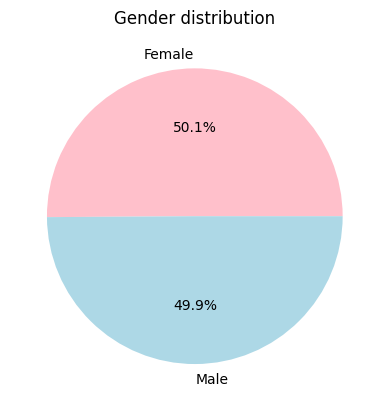

In [ ]:
#Calculate the number of orders by Gender and create a pie chart to display the percentage of which gender made more orders
GP = df['Gender'].value_counts()
print(df['Gender'].value_counts())
GP.plot(kind='pie', autopct='%1.1f%%', title='Gender distribution', colors=['pink', 'lightblue'])
plt.ylabel(None)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


Text(0, 0.5, '')

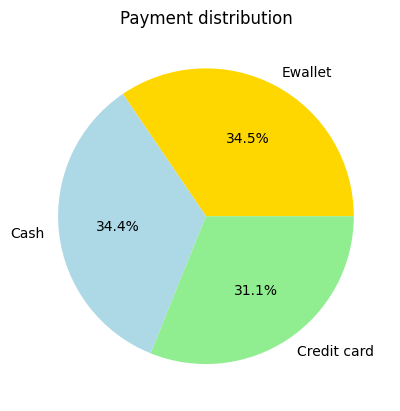

In [ ]:
#Calculate the number of orders by each payment method and create a pie chart to display the percentage of the number of times payments were made by different payment methods.
PP = df['Payment'].value_counts()
print(df['Payment'].value_counts())
PP.plot(kind='pie', autopct='%1.1f%%', title='Payment distribution', colors=['gold', 'lightblue', 'lightgreen'])
plt.ylabel(None)

In [ ]:
#Calculating which product line has the highest gross income.
LO = df.groupby(by='Product line')['gross income'].sum()
LO

,gross income
Product line,
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Food and beverages,2673.5640
Health and beauty,2342.5590
Home and lifestyle,2564.8530
Sports and travel,2624.8965


Text(0.5, 1.0, 'Gross Income as per Product line')

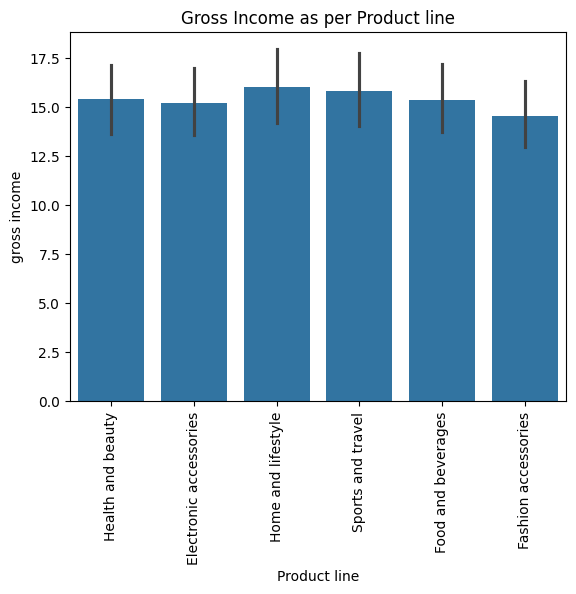

In [ ]:
#creating a bar chart to show which product line has the highest gross income.

sns.barplot(x=df['Product line'], y=df['gross income'])
plt.xticks(rotation=90)
plt.title("Gross Income as per Product line")


Text(0, 0.5, '')

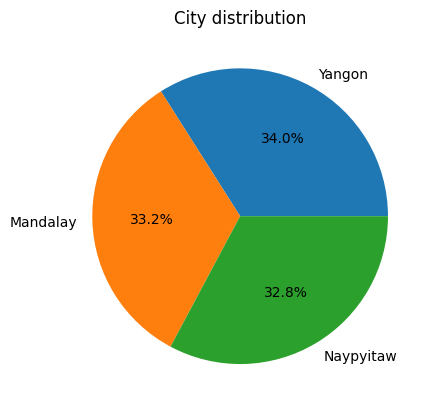

In [ ]:
#creating a pie chart to display the percentage of orders in each branch
ra=df['City'].value_counts()
df['City'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='City distribution')
plt.ylabel(None)

In [ ]:
#Review the total profits for each production line
tor=df.groupby(by='Product line')['Total'].sum()
tor

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


Text(0, 0.5, '')

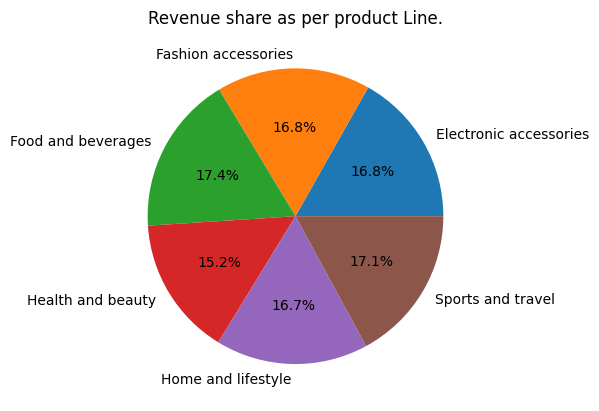

In [ ]:
#creating a pie chart to display the total profit percentage for each production line
PL = df.groupby('Product line')['Total'].sum()
PL.plot(kind='pie', autopct='%1.1f%%', labels=PL.index)
plt.title("Revenue share as per product Line.")
plt.ylabel(None)

Text(0, 0.5, 'Total Sales')

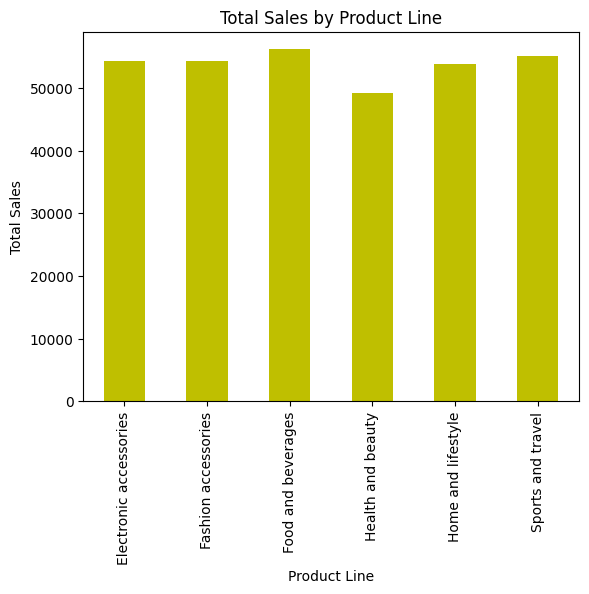

In [ ]:
#creating a bar chart for total sales by product line
PL.plot(kind='bar', color='y')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')

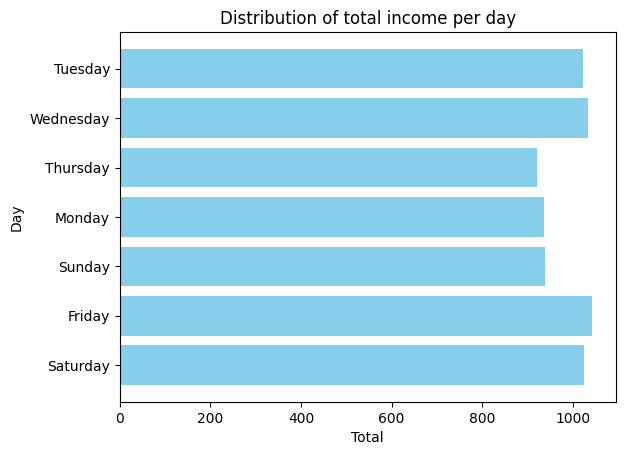

In [ ]:
# creating the bar plot for day-
plt.barh(df['Day'],df['Total'], color ='skyblue')

plt.xlabel("Total")
plt.ylabel("Day")
plt.title("Distribution of total income per day")
plt.show()

month
Jan      352
March    345
Feb      303
Name: count, dtype: int64


Text(0.5, 1.0, 'Highest Months For Sales')

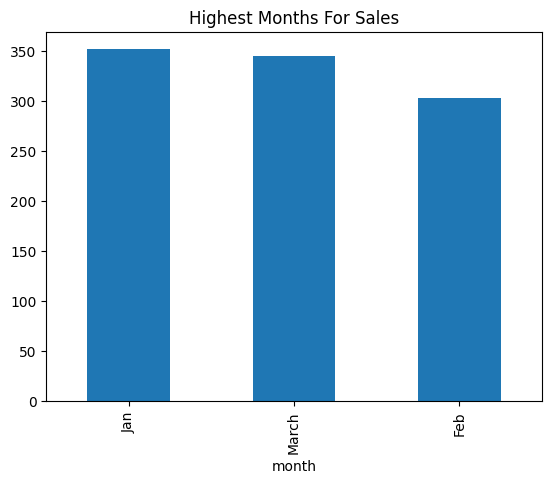

In [ ]:
#Create a column for the months using the date column and create a graph representing the sales for each month.
month_mapping={
    1:'Jan',
    2:'Feb',
    3:'March'
}
df['month']=df['Date'].dt.month.map(month_mapping)
print(df['month'].value_counts())
df['month'].value_counts().plot(kind='bar')
plt.title('Highest Months For Sales')